### Hypothesis testing
Elements of Data Science

## Hypothesis Testing Learning Goals
Develop and test an hypothesis
- Hypothesis
    - testable hypothesis
    - statistic
- Simulation: Empirical distribution
    - Repeat and collect outcomes
    - Iteration: 
        `for i in np.arange(samples)`
- Examine resulting distribution of outcomes
    - Probability distribution
    - Uncertainty
- p-test

In [ ]:
import numpy as np
from datascience import *

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Slicing from the left and right ends of an array

```
         0  1  2  3  4    index counting from left to right
data = [ 2, 3, 9, 5, 4]
        -5 -4 -3 -2 -1    index counting from right to left
        
One way to think of slicing is to thing of the indices as cutting points.        
+–+–+–+–+–+–+
|p|y|t|h|o|n|
+–+–+–+–+–+–+
0 1 2 3 4 5 6


-6  -5  -4  -3  -2  -1   
-+---+--–+--–+--–+--–+--–+
 | p | y | t | h | o | n |
-+--–+--–+--–+--–+--–+--–+
 0   1   2   3   4   5   6
 
 seq = list('python')
 seq[0:3] yields "pyt"
 seq[-3:-1] yield "ho"

```

In [ ]:
seq = list('ACGTTAGGAATTAGC')
len(seq)

In [ ]:
seq[0:10].count('G')+seq[0:10].count('C')

In [ ]:
seq[-3:-1]

In [ ]:
seq[-1]

In [ ]:
seq[-1:6]

In [ ]:
seq[-5:-3]

In [ ]:
# Also works for lists
ice_cream_flavors = ['Vanilla', 'Chocolate', 'Strawberry', 'Mint Chip', 'Peach']
ice_cream_flavors[4]

In [ ]:
ice_cream_flavors[-3]

**Students: Try slicing ice_cream_flavors using positive and negative indices**

## Hypothesis Testing

#### Test statistic differences


In [ ]:
values = np.array([1, 1, 1, 4, 5])
values

In [ ]:
values[1:] - values[:-1] # Differences computed

In [ ]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

In [ ]:
diff_n(values, 1)

In [ ]:
positive = np.count_nonzero(diff_n(values, 1)>0)
positive

In [ ]:
diff_n(values, 1)>0

In [ ]:
negative = np.count_nonzero(diff_n(values, 1) < 0)
negative

In [ ]:
net_changes = positive - negative

### Temperature data
Using `.group()` to gather data by country and ultimately apply `changes` function

In [ ]:
temps = Table.read_table('/home/jovyan/datascience/Fall 2024/Lab07/temp_per_country.csv') 
temps

In [ ]:
countries = temps.group("country", np.mean)
countries.select(['country','avg mean'])

## Creating and sampling distribution for the null hypothesis
The null hypothesis is that the temperature is equally likely to go up or down. There is no systemmatic global warming. Any apparent trend is just the result of random fluctuations.

### Inference and Climate Change

In [ ]:
# Create a table with the null hypothesis proababilities
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
uniform

In [ ]:
# Use the Table.sample_from_distribution() method to simulate the null hypothesisob
obs=[]
repeats=10000
for i in np.arange(repeats):
    sample = uniform.sample_from_distribution('Chance', 150)
    increases = sample.column("Chance sample").item(0)  
    decreases = sample.column("Chance sample").item(1)
    obs.append(increases-decreases)

In [ ]:
plt.hist(obs, bins=np.arange(-40,40,5))

In [ ]:
change_from_data = 25
np.count_nonzero(np.array(obs)>=change_from_data)/repeats # What is this value called?|

In [ ]:
# Compare the total positive and negative instances
increases = sample.column("Chance sample").item(0)  
decreases = sample.column("Chance sample").item(1)  
print("+", increases,"-",decreases, 'net',increases-decreases)

In [ ]:
!pip install meteostat
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Monthly

In [ ]:
# Set time period
start = datetime(2020, 1, 1)
end = datetime(2024, 10, 22)
# Create Point for SERC, Philadelphia
location = Point(39.9816, -75.153, 70)
# Get daily data for 2021
data = Daily(location, start, end)
data = data.fetch()
data_array = data['tavg'].values # Values in Celsius

In [ ]:
plt.plot(data_array)

In [ ]:
data.plot(y=['tavg', 'tmax', 'tmin'])

In [ ]:
from EDS import *

In [ ]:
start = datetime(1960, 1, 1)
end = datetime(2024, 10, 22)
# Create Point for SERC, Philadelphia
location = Point(39.9816, -75.153, 70)
# Get daily data for 2021
data = Daily(location, start, end)
data = data.fetch()
data_array = data['tavg'].values # Values in Celsius

In [ ]:
Temp_Oct22=data.loc[(data.index.month==10) & (data.index.day==22)]['tavg']
Temp_Oct22

In [ ]:
data_T = Table().with_columns('date',Temp_Oct22.index,'Tavg',Temp_Oct22)
data_T

In [178]:
ptrend(data_T,'date','Tavg',fmtdate='%Y')
plt.title("Temperature on October 22 ")
plt.ylabel('$^{\circ}$C ')

country,avg mean
Afghanistan,14.0191
Africa,24.0795
Albania,12.6153
Algeria,22.9739
American Samoa,26.6334
Andorra,11.2074
Angola,21.844
Anguilla,26.6151
Antigua And Barbuda,26.4427
Argentina,14.6342


In [ ]:
differences = diff_n(data_T['Tavg'], 1)
np.count_nonzero(differences>0)

### Inference and Climate Change

In [179]:
# Create a table with the null hypothesis proababilities
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
uniform

Change,Chance
Increase,0.5
Decrease,0.5


In [189]:
# Use the Table.sample_from_distribution() method to simulate the null hypothesisob
obs=[]
repeats=10000
for i in np.arange(repeats):
    sample = uniform.sample_from_distribution('Chance', 150)
    increases = sample.column("Chance sample").item(0)  
    decreases = sample.column("Chance sample").item(1)
    obs.append(increases-decreases)

(array([   11.,    37.,   137.,   225.,   643.,   762.,  1526.,  1315.,
         1942.,  1056.,  1252.,   496.,   390.,   115.,    70.]),
 array([-40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.,
         15.,  20.,  25.,  30.,  35.]),
 <BarContainer object of 15 artists>)

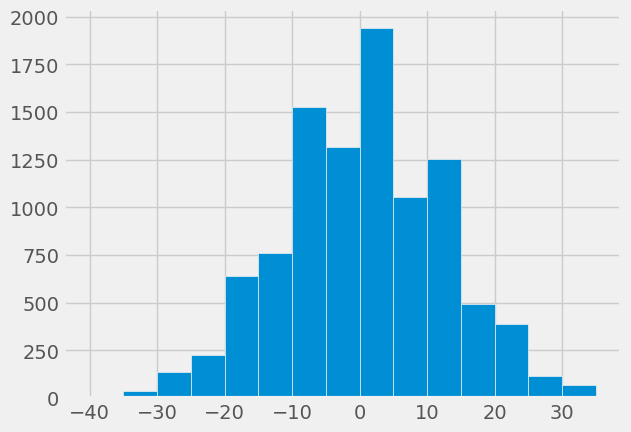

In [190]:
plt.hist(obs, bins=np.arange(-40,40,5))

In [192]:
change_from_data = 25
np.count_nonzero(np.array(obs)>=change_from_data)/repeats # What is this value called?|

0.0206

In [193]:
# Compare the total positive and negative instances
increases = sample.column("Chance sample").item(0)  
decreases = sample.column("Chance sample").item(1)  
print("+", increases,"-",decreases, 'net',increases-decreases)

+ 70 - 80 net -10


In [194]:
!pip install meteostat
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Monthly

In [216]:
# Set time period
start = datetime(2020, 1, 1)
end = datetime(2024, 10, 22)
# Create Point for SERC, Philadelphia
location = Point(39.9816, -75.153, 70)
# Get daily data for 2021
data = Daily(location, start, end)
data = data.fetch()
data_array = data['tavg'].values # Values in Celsius

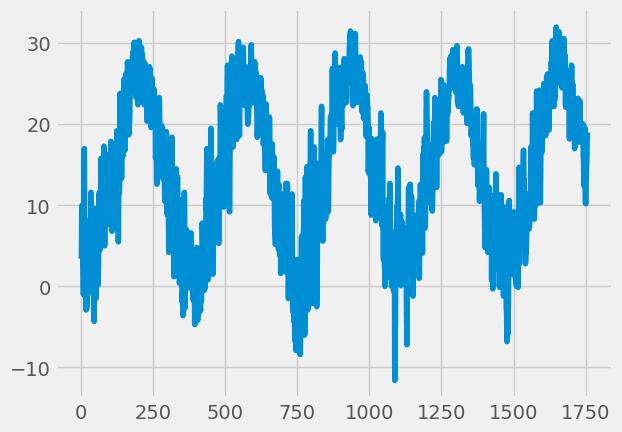

In [217]:
plt.plot(data_array)

<Axes: xlabel='time'>

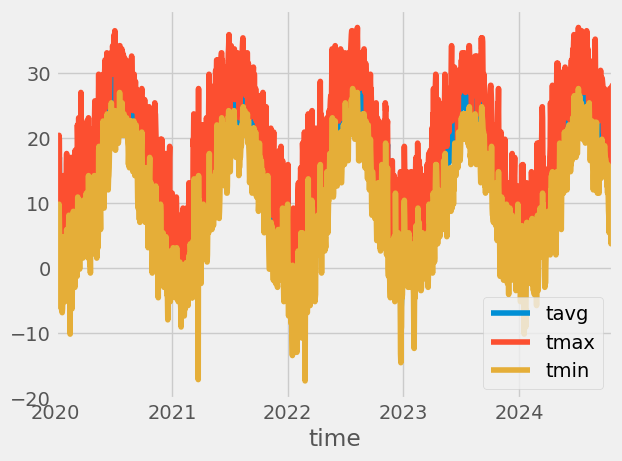

In [218]:
data.plot(y=['tavg', 'tmax', 'tmin'])

In [219]:
from EDS import *

In [222]:
start = datetime(1960, 1, 1)
end = datetime(2024, 10, 22)
# Create Point for SERC, Philadelphia
location = Point(39.9816, -75.153, 70)
# Get daily data for 2021
data = Daily(location, start, end)
data = data.fetch()
data_array = data['tavg'].values # Values in Celsius

In [231]:
Temp_Oct22=data.loc[(data.index.month==10) & (data.index.day==22)]['tavg']
Temp_Oct22

time
1960-10-22     NaN
1961-10-22     NaN
1962-10-22     NaN
1963-10-22     NaN
1964-10-22     NaN
              ... 
2020-10-22    19.1
2021-10-22    16.4
2022-10-22    11.5
2023-10-22    12.0
2024-10-22    19.0
Name: tavg, Length: 65, dtype: float64

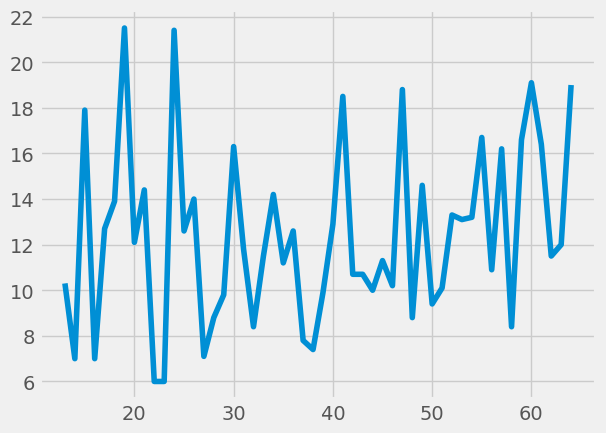

In [230]:
plt.plot(Temp_Oct22)

In [244]:
data_T = Table().with_columns('date',Temp_Oct22.index,'Tavg',Temp_Oct22)
data_T

date,Tavg
1960-10-22 00:00:00,nan
1961-10-22 00:00:00,nan
1962-10-22 00:00:00,nan
1963-10-22 00:00:00,nan
1964-10-22 00:00:00,nan
1965-10-22 00:00:00,nan
1966-10-22 00:00:00,nan
1967-10-22 00:00:00,nan
1968-10-22 00:00:00,nan
1969-10-22 00:00:00,nan


Text(0, 0.5, '$^{\\circ}$C ')

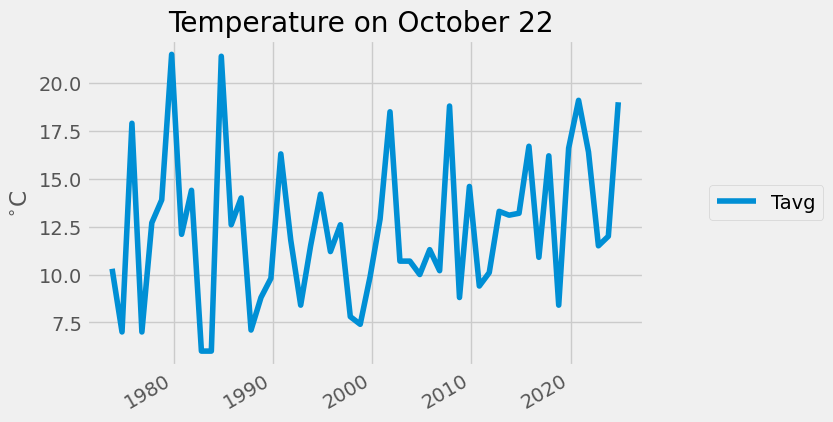

In [251]:
ptrend(data_T,'date','Tavg',fmtdate='%Y')
plt.title("Temperature on October 22 ")
plt.ylabel('$^{\circ}$C ')

In [245]:
differences = diff_n(data_T['Tavg'], 1)
np.count_nonzero(differences>0)

28

### Inference and Climate Change

In [252]:
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
uniform.sample_from_distribution('Chance', 100)

Change,Chance,Chance sample
Increase,0.5,51
Decrease,0.5,49


In [253]:
sample = uniform.sample_from_distribution('Chance', 100)
increases = sample.column("Chance sample").item(0)  
decreases = sample.column("Chance sample").item(1)  
print("+", increases,"-",decreases, 'net increase:',increases-decreases)

+ 54 - 46


In [254]:
sample

Change,Chance,Chance sample
Increase,0.5,54
Decrease,0.5,46
